In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import locale
import numpy as np
import os


In [8]:
dataset_dir = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(''))), 'datasets')
llamados= pd.read_excel(os.path.join(dataset_dir, 'xlsx/llamados_v2.xlsx'))

### Faltantes por columna

In [ ]:
llamados.isnull().sum()

### Descripciones

In [5]:
llamados.describe(include=[object])

,llamado_provincia,llamante_genero,llamante_vinculo,caso_judicializado,hecho_lugar,victima_a_resguardo,victima_genero,victima_nacionalidad,victima_vinculo_agresor,victima_discapacidad,...,ofv_intento_privacion_libertad,ofv_privacion_libertad,ofv_uso_arma_blanca,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta
count,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143,...,19143,19143,19143,19143,19143,19143,19143,19143,19143,19143
unique,25,4,16,3,17,2,4,9,15,3,...,2,2,2,2,2,2,2,2,2,2
top,CABA,Femenino,Comisaría,NO,NS/NC,SI,Femenino,Argentina,"Conocido no familiar (Amigo, vecino, entre otros)",NS/NC,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI
freq,7083,13130,4769,8950,5675,17840,14869,15475,3790,10297,...,19106,19051,19112,19120,18880,19141,19137,18835,17802,10932


In [7]:
llamados.describe(exclude=[object])

,llamado_fecha_hora,llamante_edad,victima_edad
count,19143,10563.000000,17263.000000
mean,2019-08-04 12:53:58.129760256,36.250118,17.167294
min,2016-11-19 12:46:38,3.000000,0.000000
25%,2018-09-17 14:03:04.500000,29.000000,10.000000
50%,2019-08-26 17:15:00,35.000000,14.000000
75%,2020-09-25 18:25:00,42.000000,21.000000
max,2021-07-31 23:45:00,99.000000,99.000000
std,NaN,11.417725,11.910669


### Llamados por provincia

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/1513719012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_provincia = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/1513719012.py:2: UserWarning: 
The palette list has fewer values (8) than needed (25) and will cycle, which may produce an uninterpretable plot.
  plot_provincia = sns.barplot(


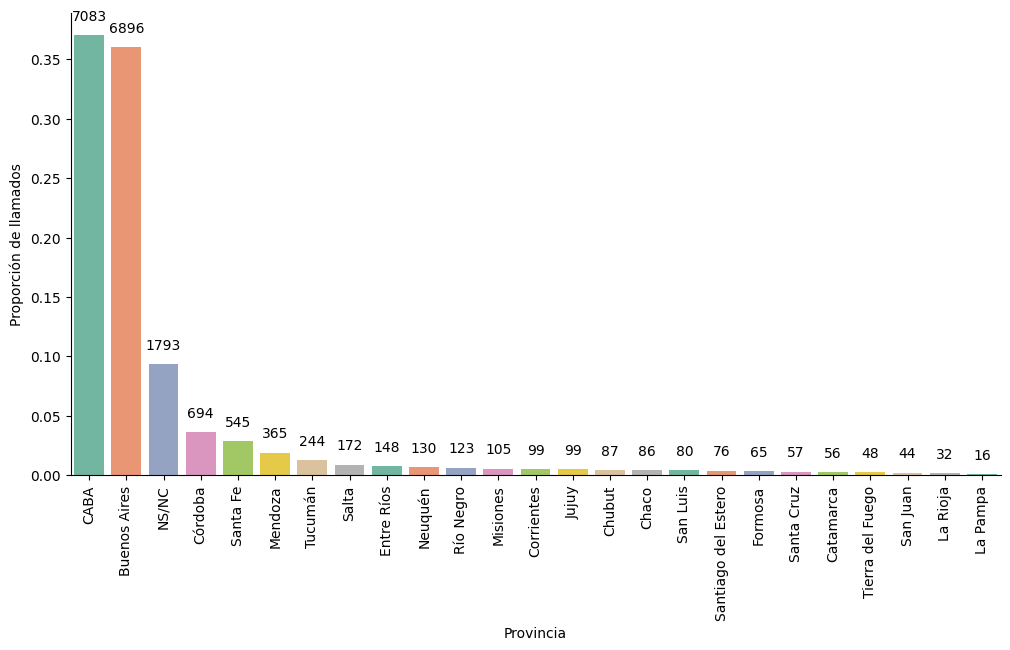

In [81]:
plt.figure(figsize=(12, 6))
plot_provincia = sns.barplot(
    x=llamados.llamado_provincia.value_counts(normalize=True).index,
    y=llamados.llamado_provincia.value_counts(normalize=True).values,
    palette=sns.color_palette("Set2")
)

# Anotación de las barras
for i, count in enumerate(llamados.llamado_provincia.value_counts().values):
    plot_provincia.text(i, llamados.llamado_provincia.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_provincia.set(xlabel='Provincia', ylabel='Proporción de llamados')

plt.xticks(rotation=90)
sns.despine()
plt.show()

In [19]:
llamados.shape

(19143, 53)

In [26]:
545/19143*100

2.846993679151648

In [28]:
povincia_counts = llamados['llamado_provincia'].value_counts(normalize=True)*100
povincia_counts

llamado_provincia
CABA                   37.000470
Buenos Aires           36.023612
NS/NC                   9.366348
Córdoba                 3.625346
Santa Fe                2.846994
Mendoza                 1.906702
Tucumán                 1.274617
Salta                   0.898501
Entre Ríos              0.773129
Neuquén                 0.679099
Río Negro               0.642533
Misiones                0.548503
Corrientes              0.517160
Jujuy                   0.517160
Chubut                  0.454474
Chaco                   0.449250
San Luis                0.417907
Santiago del Estero     0.397012
Formosa                 0.339550
Santa Cruz              0.297759
Catamarca               0.292535
Tierra del Fuego        0.250744
San Juan                0.229849
La Rioja                0.167163
La Pampa                0.083581
Name: proportion, dtype: float64

### Cantidad de denuncias por género

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/3757408629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_genero = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/3757408629.py:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  plot_genero = sns.barplot(


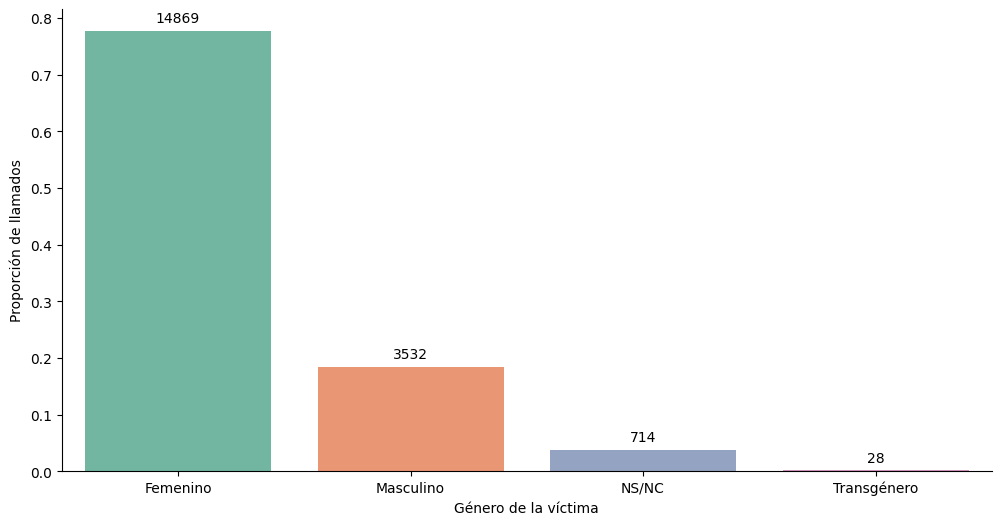

In [90]:
plt.figure(figsize=(12, 6))
plot_genero = sns.barplot(
    x=llamados.victima_genero.value_counts(normalize=True).index,
    y=llamados.victima_genero.value_counts(normalize=True).values,
    palette=sns.color_palette("Set2")
)

# Anotación de las barras
for i, count in enumerate(llamados.victima_genero.value_counts().values):
    plot_genero.text(i, llamados.victima_genero.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_genero.set(xlabel='Género de la víctima', ylabel='Proporción de llamados')

plt.xticks(rotation=0)
sns.despine()
plt.show()

In [135]:
llamados.shape

(19143, 58)

In [158]:
571/19143*100

2.9828135610928275

In [154]:
78+19+3+0.14

100.14

### Vínculos agresor-víctima

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/1139911472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_genero = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/1139911472.py:2: UserWarning: 
The palette list has fewer values (8) than needed (15) and will cycle, which may produce an uninterpretable plot.
  plot_genero = sns.barplot(


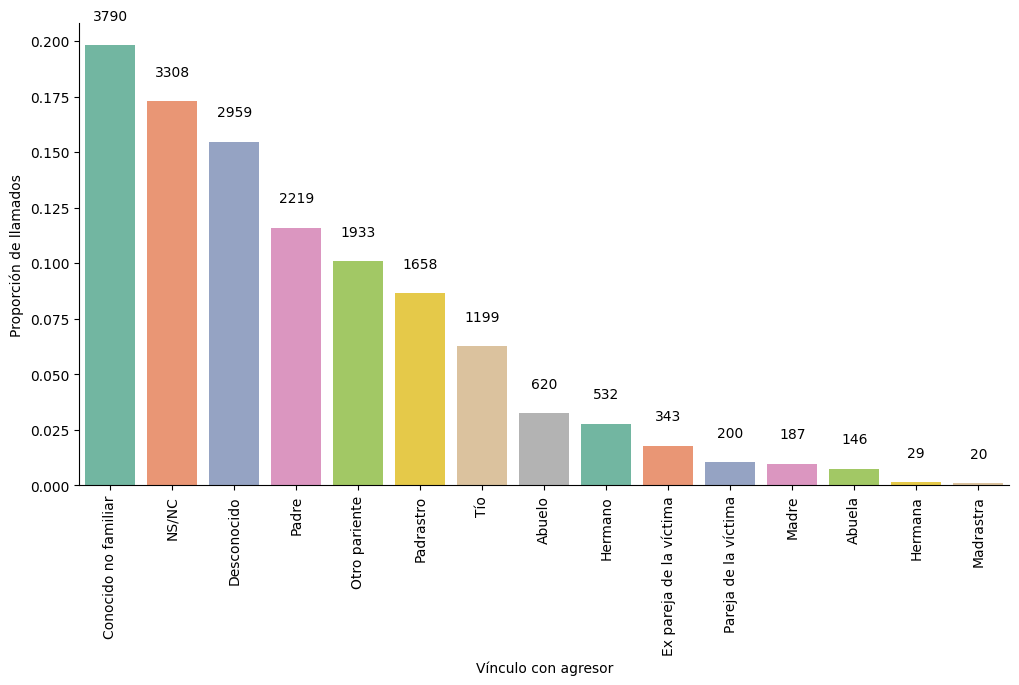

In [92]:
plt.figure(figsize=(12, 6))
plot_vinculo_agresor = sns.barplot(
    x=llamados.victima_vinculo_agresor.value_counts(normalize=True).index,
    y=llamados.victima_vinculo_agresor.value_counts(normalize=True).values,
    palette=sns.color_palette("Set2")
)

# Anotación de las barras
for i, count in enumerate(llamados.victima_vinculo_agresor.value_counts().values):
    plot_vinculo_agresor.text(i, llamados.victima_vinculo_agresor.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_vinculo_agresor.set(xlabel='Vínculo con agresor', ylabel='Proporción de llamados')

plt.xticks(rotation=90)
sns.despine()
plt.show()

In [25]:
vinculo_agresor_counts = llamados['victima_vinculo_agresor'].value_counts(normalize=True)*100
vinculo_agresor_counts

victima_vinculo_agresor
Conocido no familiar (Amigo, vecino, entre otros)    19.798360
NS/NC                                                17.280468
Desconocido                                          15.457347
Padre                                                11.591705
Otro pariente                                        10.097686
Padrastro                                             8.661129
Tío                                                   6.263386
Abuelo                                                3.238782
Hermano                                               2.779084
Ex pareja de la víctima                               1.791778
Pareja de la víctima                                  1.044768
Madre                                                 0.976858
Abuela                                                0.762681
Hermana                                               0.151491
Madrastra                                             0.104477
Name: proportion, dtype: float6

### Vínculos denunciante-víctima

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/1294629325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_genero = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/1294629325.py:2: UserWarning: 
The palette list has fewer values (8) than needed (16) and will cycle, which may produce an uninterpretable plot.
  plot_genero = sns.barplot(


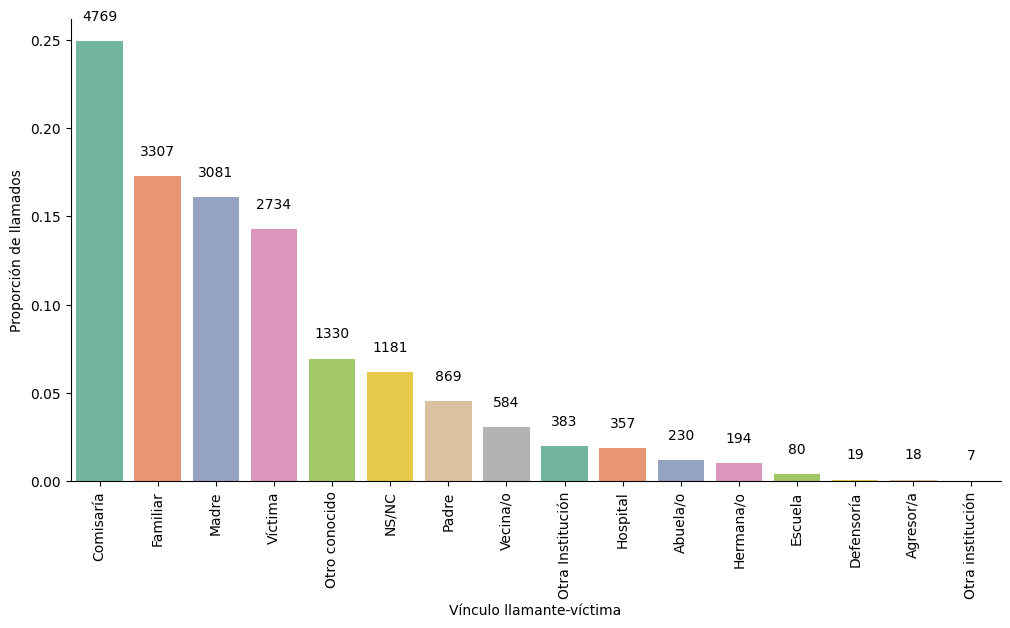

In [93]:
plt.figure(figsize=(12, 6))
plot_vinculo_llamante = sns.barplot(
    x=llamados.llamante_vinculo.value_counts(normalize=True).index,
    y=llamados.llamante_vinculo.value_counts(normalize=True).values,
    palette=sns.color_palette("Set2")
)

# Anotación de las barras
for i, count in enumerate(llamados.llamante_vinculo.value_counts().values):
    plot_vinculo_llamante.text(i, llamados.llamante_vinculo.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_vinculo_llamante.set(xlabel='Vínculo llamante-víctima', ylabel='Proporción de llamados')

plt.xticks(rotation=90)
sns.despine()
plt.show()

In [27]:
llamante_vinculo_counts = round(llamados['llamante_vinculo'].value_counts(normalize=True)*100,2)
llamante_vinculo_counts

llamante_vinculo
Comisaría           24.91
Familiar            17.28
Madre               16.09
Víctima             14.28
Otro conocido        6.95
NS/NC                6.17
Padre                4.54
Vecina/o             3.05
Otra Institución     2.00
Hospital             1.86
Abuela/o             1.20
Hermana/o            1.01
Escuela              0.42
Defensoría           0.10
Agresor/a            0.09
Otra institución     0.04
Name: proportion, dtype: float64

In [49]:
llamados.shape

(19143, 54)

In [69]:
1085/19143*100

5.667868150237685

In [67]:
4787/19143*100

25.006529802016402

In [71]:
29+25+13+12

79

### Lugares de los hechos

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/3496023011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_hecho_lugar = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/3496023011.py:2: UserWarning: 
The palette list has fewer values (8) than needed (17) and will cycle, which may produce an uninterpretable plot.
  plot_hecho_lugar = sns.barplot(


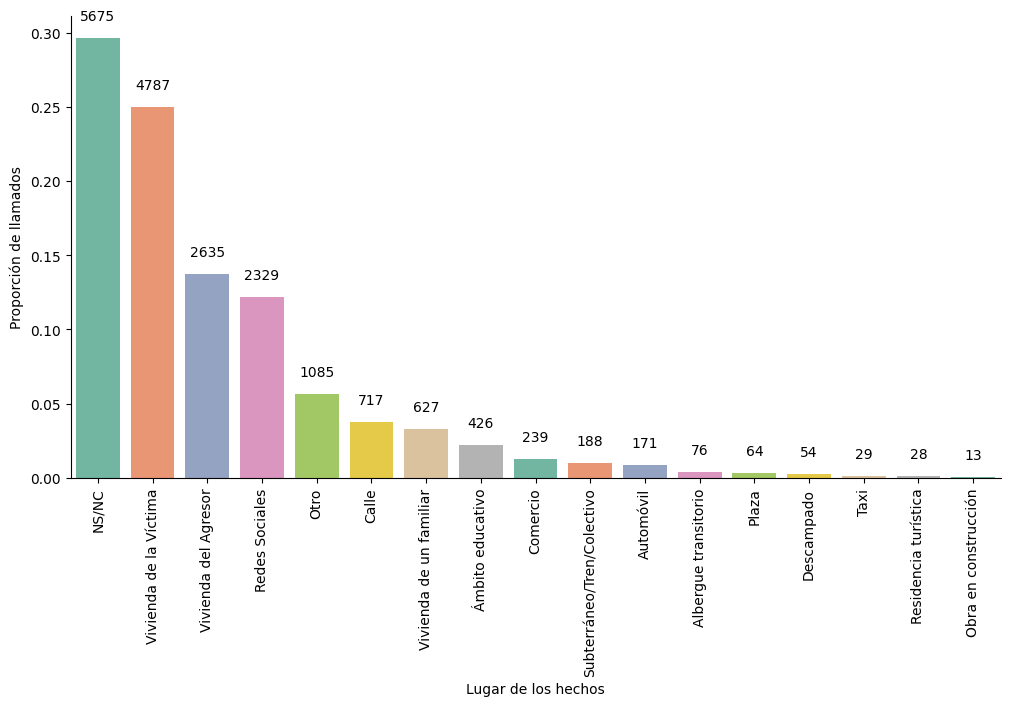

In [85]:
plt.figure(figsize=(12, 6))
plot_hecho_lugar = sns.barplot(
    x=llamados.hecho_lugar.value_counts(normalize=True).index,
    y=llamados.hecho_lugar.value_counts(normalize=True).values,
    palette=sns.color_palette("Set2")
)

# Anotación de las barras
for i, count in enumerate(llamados.hecho_lugar.value_counts().values):
    plot_hecho_lugar.text(i, llamados.hecho_lugar.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_hecho_lugar.set(xlabel='Lugar de los hechos', ylabel='Proporción de llamados')

plt.xticks(rotation=90)
sns.despine()
plt.show()

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2270942962.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['age_group'] = pd.cut(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2270942962.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=si_counts_normalized.index, y=si_counts_normalized.values, palette=sns.color_palette("Set2"))
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2270942962.py:39: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable pl

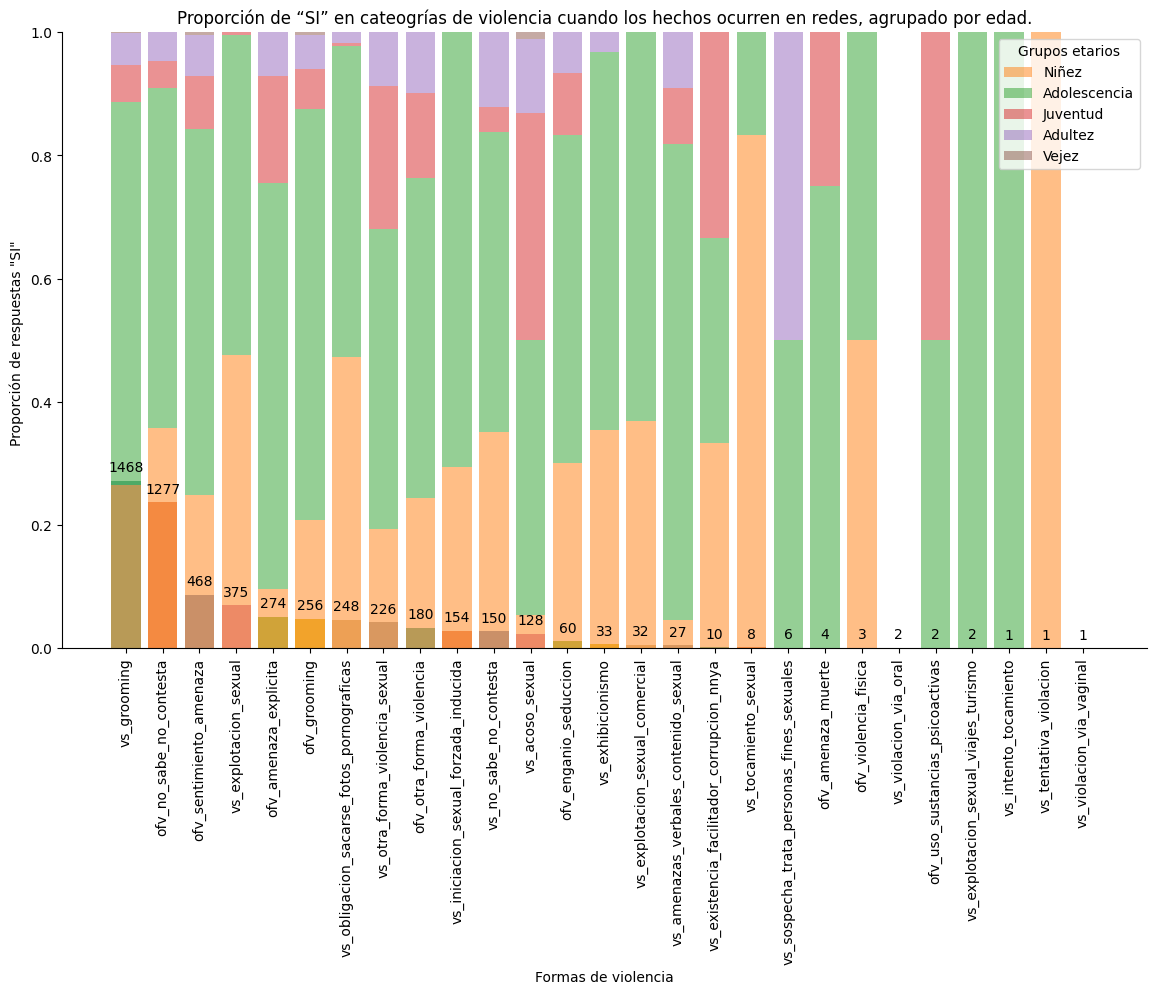

In [86]:


# Filter the dataset where 'hecho_lugar' is 'Redes Sociales'
filtered_data = llamados[llamados['hecho_lugar'] == 'Redes Sociales']

# Select columns that start with 'vs_' or 'ofv_'
selected_columns = filtered_data.filter(regex='^(vs_|ofv_)')

# Count the number of "SI" in each of the selected columns
si_counts = selected_columns.apply(lambda x: (x == 'SI').sum())

# Filter out columns with 0 counts and sort by the counts
si_counts = si_counts[si_counts > 0].sort_values(ascending=False)

# Normalize the counts (proportions between 0 and 1)
si_counts_normalized = si_counts / si_counts.sum()

# Create age bins (e.g., children, adolescents, adults)
filtered_data['age_group'] = pd.cut(
    filtered_data['victima_edad'], 
    bins=[0, 11, 18, 30, 65, 120], 
    labels=['Niñez', 'Adolescencia', 'Juventud', 'Adultez', 'Vejez']
)




# Calculate the number of "SI" responses by age group for each category
age_group_counts = {}
for col in selected_columns.columns:
    age_group_counts[col] = filtered_data[filtered_data[col] == 'SI']['age_group'].value_counts()

# Convert the age group counts into a DataFrame
age_group_counts_df = pd.DataFrame(age_group_counts).fillna(0)

# Normalize the age group counts by total in each category
age_group_counts_df = age_group_counts_df.div(age_group_counts_df.sum(axis=0), axis=1)

# Plot the original normalized SI counts
plt.figure(figsize=(14, 8))
plot = sns.barplot(x=si_counts_normalized.index, y=si_counts_normalized.values, palette=sns.color_palette("Set2"))

# Annotate the bars with the actual counts
for i, count in enumerate(si_counts):
    plot.text(i, si_counts_normalized.iloc[i] + 0.01, str(count), ha='center', va='bottom')

# Overlay the age group information using a stacked bar
bottom = [0] * len(si_counts_normalized)
for age_group in age_group_counts_df.index:
    age_values = age_group_counts_df.loc[age_group, si_counts_normalized.index]
    plt.bar(si_counts_normalized.index, age_values, bottom=bottom, label=f'{age_group}', alpha=0.5)
    bottom += age_values

# Add titles and labels
plt.title('Proporción de “SI” en cateogrías de violencia cuando los hechos ocurren en redes, agrupado por edad.')
plt.xlabel('Formas de violencia')
plt.ylabel('Proporción de respuestas "SI" ')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend to explain the age groups
plt.legend(title='Grupos etarios')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()




/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_64287/1665632878.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['edad_cat'] = pd.cut(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_64287/1665632878.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=si_counts_normalized.index, y=si_counts_normalized.values, palette='husl')


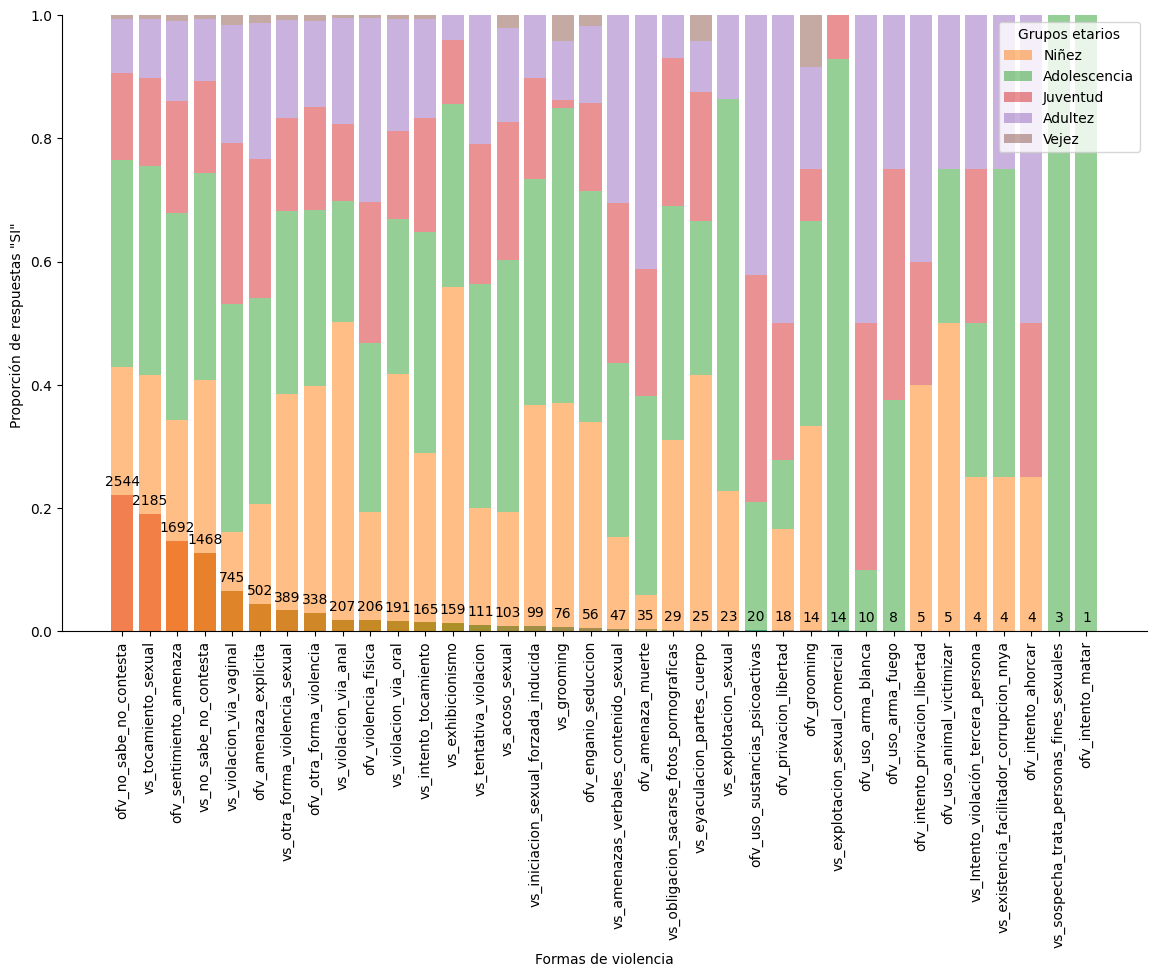

In [6]:
# Objetivo: un plot en que pueda ver para cada grupo etario qué tipos de hechos de violencia suceden en el hogar.
# Constraints: 
# 1. Solo me importan las filas en que los hechos suceden en el hogar
# 2. Solo me importa contar las filas en que las varaibles de violencia tienen respuesta SI
# 3. La edad tiene que estar categorizada

# Dataset: me quedo colo con las filas en las que la columna 'hecho lugar' toma el valor 'vivienda de la víctima'
filtered_data = llamados[llamados['hecho_lugar'] == 'Vivienda de la Víctima']

# Elijo las columnas de interés: violencia
selected_columns = filtered_data.filter(regex='^(vs_|ofv_)')

# Cuento para cada variable de violencia, la cantidad de SI
si_counts = selected_columns.apply(lambda x: (x == 'SI').sum())

# Saco las variables de violencia que tienen 0 SI para no plotear cosas vacías
si_counts = si_counts[si_counts > 0].sort_values(ascending=False)

# Normalizo SI counts para después
si_counts_normalized = si_counts / si_counts.sum()

# Categorizo la edad dentro del dataset filtrado (esto se podía hacer previamente)
filtered_data['edad_cat'] = pd.cut(
    filtered_data['victima_edad'], 
    bins=[0, 11, 18, 30, 65, 120], 
    labels=['Niñez', 'Adolescencia', 'Juventud', 'Adultez', 'Vejez']
)


# Diccionario con key 'tipo de violencia' y value otro diccionario (serie) con key: grupo etario y value conteo de SI 
# por ejemplo: 
''' age_group_counts = {
    'vs_violencia_sexual': pd.Series({
        'Juventud': 10,
        'Adolescencia': 20,
        
    }),
    'ofv_violencia_fisica': pd.Series({
        'Juventud': 15,
        'adolescencia': 25,
    })
}'''
age_group_counts = {}
for col in selected_columns.columns:
    age_group_counts[col] = filtered_data[filtered_data[col] == 'SI']['edad_cat'].value_counts()


# y ahora df del diccionario
# cada fila es un grupo etario y cada columna una variable de violencia. En las celdas la cantidad de SI para cada violencia y grupo etario
age_group_counts_df = pd.DataFrame(age_group_counts).fillna(0)

# Normalizar
age_group_counts_df = age_group_counts_df.div(age_group_counts_df.sum(axis=0), axis=1)

# Plot de barras apiladas:

# Plot 1: SI counts normalizados
plt.figure(figsize=(14, 8))
plot = sns.barplot(x=si_counts_normalized.index, y=si_counts_normalized.values, palette='husl')

# Anotar cada barra con cantidades originales (no normalizadas)
for i, count in enumerate(si_counts):
    plot.text(i, si_counts_normalized.iloc[i] + 0.01, str(count), ha='center', va='bottom')

# “Plot 2“ información de grupos etarios por arriba del plot 1

# esta lista va a servir para ir acumulando las alturas de cada barra/variable de violencia en eje x
# La altura de las barras se updatea con cada nuevo grupo etario 
bottom = [0] * len(si_counts_normalized)
#por cada grupo etario:
for age_group in age_group_counts_df.index:
#arma una serie con los valores normalizados de ese grupo para cada categoría de violencia
# por ejemplo: ofv_no_sabe_no_contesta     0.0000563
    age_values = age_group_counts_df.loc[age_group, si_counts_normalized.index]

# y luego por cada grupo etario plotea una barra para cada varaible de violencia (si_counts.index), con altura “age_values”. 
# Cada nueva barra stacked se arma sobre el bottom, que se actualiza con cada nuevo grupo etario y así se apilan.
    plt.bar(si_counts_normalized.index, age_values, bottom=bottom, label=f'{age_group}', alpha=0.5)
    bottom += age_values


plt.title('')
plt.xlabel('Formas de violencia')
plt.ylabel('Proporción de respuestas "SI" ')
plt.xticks(rotation=90)
plt.legend(title='Grupos etarios')

sns.despine()

plt.show()

In [20]:
si_counts_normalized.index

Index(['ofv_no_sabe_no_contesta', 'vs_tocamiento_sexual',
       'ofv_sentimiento_amenaza', 'vs_no_sabe_no_contesta',
       'vs_violacion_via_vaginal', 'ofv_amenaza_explicita',
       'vs_otra_forma_violencia_sexual', 'ofv_otra_forma_violencia',
       'vs_violacion_via_anal', 'ofv_violencia_fisica',
       'vs_violacion_via_oral', 'vs_intento_tocamiento', 'vs_exhibicionismo',
       'vs_tentativa_violacion', 'vs_acoso_sexual',
       'vs_iniciacion_sexual_forzada_inducida', 'vs_grooming',
       'ofv_enganio_seduccion', 'vs_amenazas_verbales_contenido_sexual',
       'ofv_amenaza_muerte', 'vs_obligacion_sacarse_fotos_pornograficas',
       'vs_eyaculacion_partes_cuerpo', 'vs_explotacion_sexual',
       'ofv_uso_sustancias_psicoactivas', 'ofv_privacion_libertad',
       'ofv_grooming', 'vs_explotacion_sexual_comercial',
       'ofv_uso_arma_blanca', 'ofv_uso_arma_fuego',
       'ofv_intento_privacion_libertad', 'ofv_uso_animal_victimizar',
       'vs_Intento_violación_tercera_persona'

### Convivencia víctimas - agresor

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/4288559975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_victima_convive_agresor = sns.barplot(


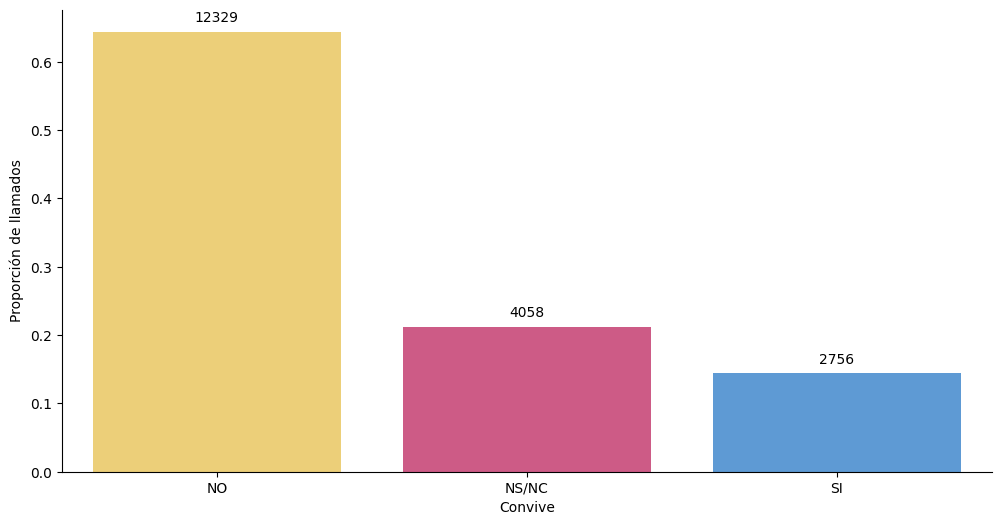

In [89]:
palette_sino_desat ={"SI": "#4a9ae8", "NO": "#ffd966", "NS/NC": "#e04881"}

plt.figure(figsize=(12, 6))
plot_victima_convive_agresor = sns.barplot(
    x=llamados.victima_convive_agresor.value_counts(normalize=True).index,
    y=llamados.victima_convive_agresor.value_counts(normalize=True).values,
    palette=palette_sino_desat
)

# Anotación de las barras
for i, count in enumerate(llamados.victima_convive_agresor.value_counts().values):
    plot_victima_convive_agresor.text(i, llamados.victima_convive_agresor.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_victima_convive_agresor.set(xlabel='Convive', ylabel='Proporción de llamados')

plt.xticks(rotation=0)
sns.despine()
plt.show()

In [169]:
4058/19143*100

21.198349266050254

### Existencia de discapacidad en la víctimas

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/3331130100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_victima_discapacidad = sns.barplot(


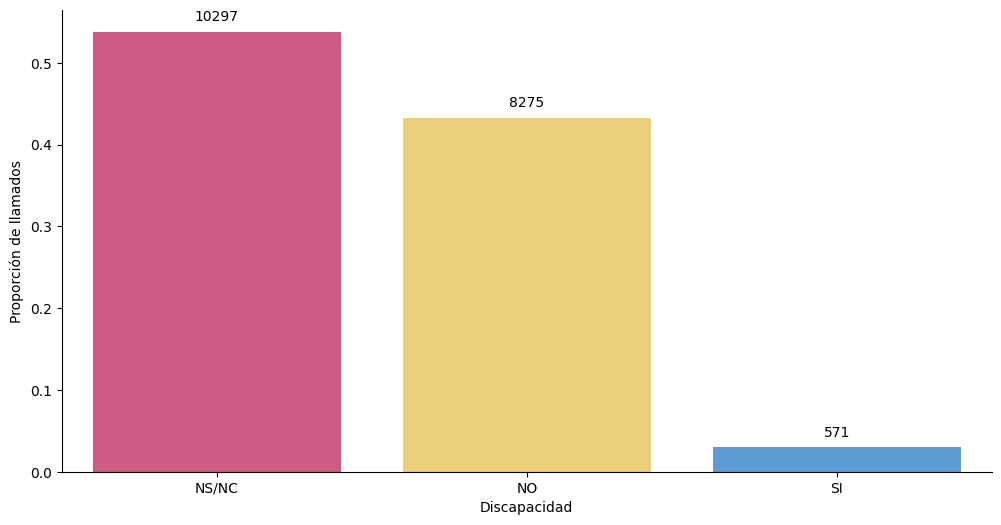

In [95]:
palette_sino_desat ={"SI": "#4a9ae8", "NO": "#ffd966", "NS/NC": "#e04881"}

plt.figure(figsize=(12, 6))
plot_victima_discapacidad = sns.barplot(
    x=llamados.victima_discapacidad.value_counts(normalize=True).index,
    y=llamados.victima_discapacidad.value_counts(normalize=True).values,
    palette=palette_sino_desat
)

# Anotación de las barras
for i, count in enumerate(llamados.victima_discapacidad.value_counts().values):
    plot_victima_discapacidad.text(i, llamados.victima_discapacidad.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_victima_discapacidad.set(xlabel='Discapacidad', ylabel='Proporción de llamados')

plt.xticks(rotation=0)
sns.despine()
plt.show()

### Caso judicializado


/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_9803/3269539663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_caso_judicializado = sns.barplot(


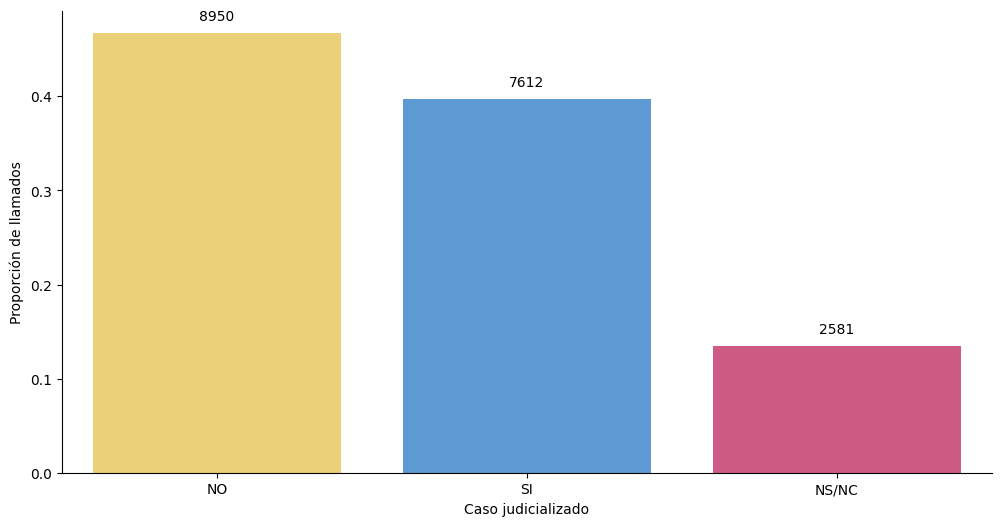

In [26]:
palette_sino_desat ={"SI": "#4a9ae8", "NO": "#ffd966", "NS/NC": "#e04881"}

plt.figure(figsize=(12, 6))
plot_caso_judicializado = sns.barplot(
    x=llamados.caso_judicializado.value_counts(normalize=True).index,
    y=llamados.caso_judicializado.value_counts(normalize=True).values,
    palette=palette_sino_desat
)

# Anotación de las barras
for i, count in enumerate(llamados.caso_judicializado.value_counts().values):
    plot_caso_judicializado.text(i, llamados.caso_judicializado.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_caso_judicializado.set(xlabel='Caso judicializado', ylabel='Proporción de llamados')

plt.xticks(rotation=0)
sns.despine()
plt.show()

In [29]:
(2581/19143)*100

13.482735203468632

### Nacionalidad víctima

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2406180456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_nacionalidad = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/2406180456.py:2: UserWarning: 
The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.
  plot_nacionalidad = sns.barplot(


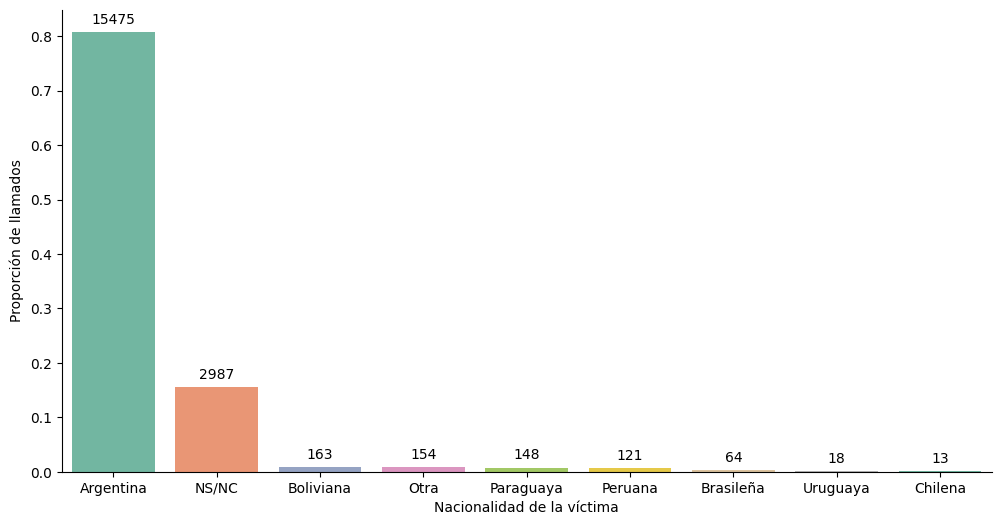

In [96]:
plt.figure(figsize=(12, 6))
plot_nacionalidad = sns.barplot(
    x=llamados.victima_nacionalidad.value_counts(normalize=True).index,
    y=llamados.victima_nacionalidad.value_counts(normalize=True).values,
    palette=sns.color_palette("Set2")
)

# Anotación de las barras
for i, count in enumerate(llamados.victima_nacionalidad.value_counts().values):
    plot_nacionalidad.text(i, llamados.victima_nacionalidad.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_nacionalidad.set(xlabel='Nacionalidad de la víctima', ylabel='Proporción de llamados')

plt.xticks(rotation=0)
sns.despine()
plt.show()

### Numéricos

### Edad

In [131]:
cols_numericas = llamados.iloc[:, 1:5]


In [142]:
%%capture
llamados.drop(['llamado_provincia_id'], axis=1, inplace=True)

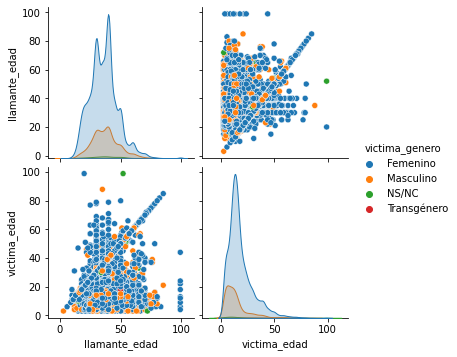

In [189]:
g = sns.pairplot(llamados, hue="victima_genero")

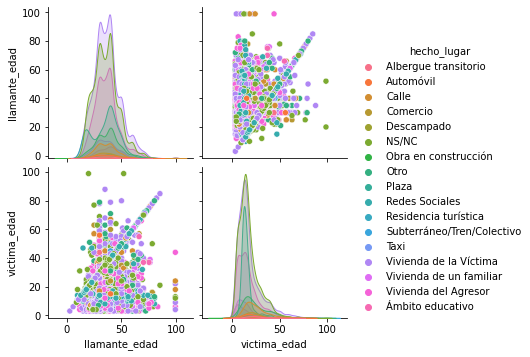

In [190]:
g = sns.pairplot(llamados, hue="hecho_lugar")

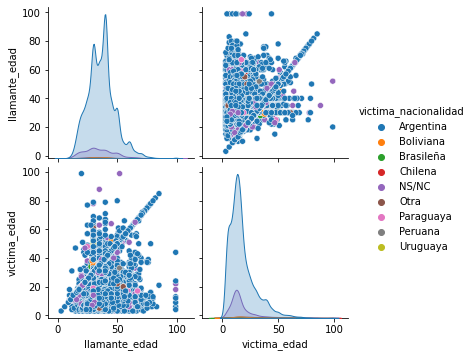

In [191]:
g = sns.pairplot(llamados, hue="victima_nacionalidad")

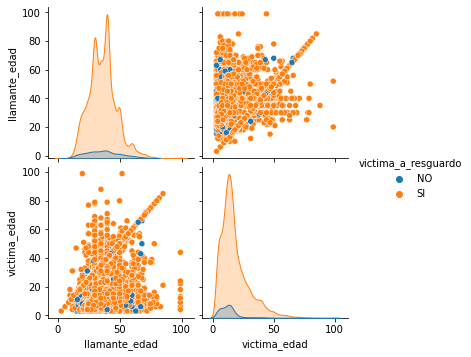

In [192]:
g = sns.pairplot(llamados, hue="victima_a_resguardo")

### Construcción de variables

In [103]:
#lista_noa = ['Jujuy', 'Salta', 'Tucumán', 'Catamarca', 'La Rioja', 'Santiago del Estero']
#lista_noe=['Formosa', 'Chaco', 'Corrientes', 'Misiones']
lista_norte=['Jujuy', 'Salta', 'Tucumán', 'Catamarca', 'La Rioja', 'Santiago del Estero','Formosa', 'Chaco', 'Corrientes', 'Misiones']
#lista_cuyo=['San Luis', 'San Juan', 'Mendoza']
#lista_pampeana=['Córdoba', 'Entre Ríos','La Pampa', 'Santa Fe']
lista_centro = ['San Luis', 'San Juan', 'Mendoza','Córdoba', 'Entre Ríos','La Pampa', 'Santa Fe']
lista_patagonia=['Chubut', 'Neuquén', 'Río Negro', 'Santa Cruz', 'Tierra del Fuego']

def provincias_red(x):
    if x == 'NS/NC':
        return x
    elif x == 'CABA':
        return x
    elif x=='Buenos Aires':
        return x
    elif x in lista_norte:
        return 'Región Norte'
    elif x in lista_centro:
        return 'Región Central'
    elif x in lista_patagonia:
        return 'Región Patagónica'
    else:
        return 'N/A'

llamados['llamado_provincia_red'] = \
    llamados.llamado_provincia.apply(provincias_red)

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/772910980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_llamado_region = sns.barplot(
/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_24963/772910980.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  plot_llamado_region = sns.barplot(


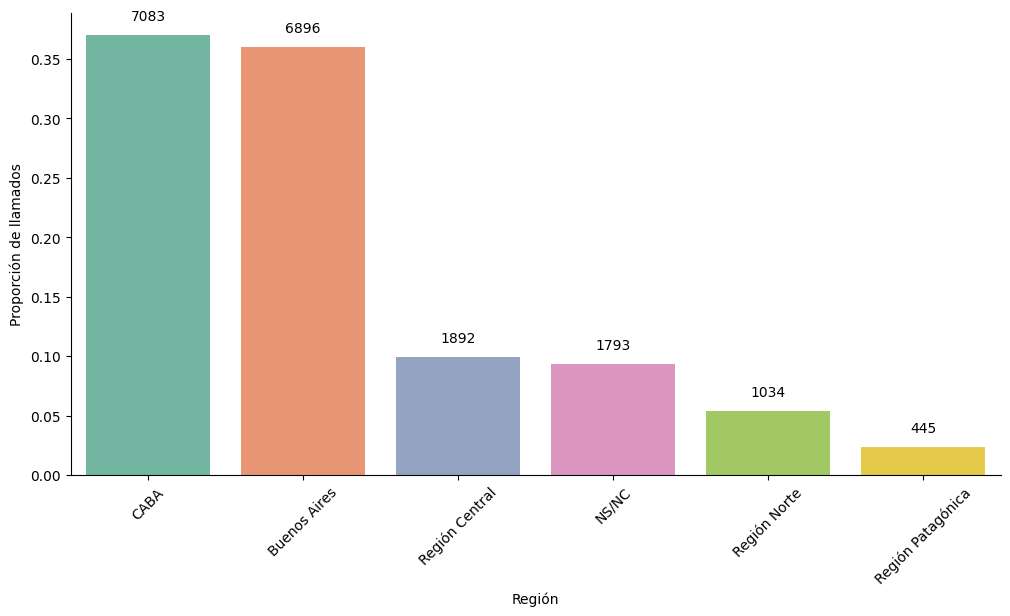

In [104]:
plt.figure(figsize=(12, 6))
plot_llamado_region = sns.barplot(
    x=llamados.llamado_provincia_red.value_counts(normalize=True).index,
    y=llamados.llamado_provincia_red.value_counts(normalize=True).values,
    palette=sns.color_palette("Set2")
)

# Anotación de las barras
for i, count in enumerate(llamados.llamado_provincia_red.value_counts().values):
    plot_llamado_region.text(i, llamados.llamado_provincia_red.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_llamado_region.set(xlabel='Región', ylabel='Proporción de llamados')

plt.xticks(rotation=45)
sns.despine()
plt.show()

### Género agresor

In [48]:
# género dell agresor
lista_hombre = [ 'Abuelo', 'Hermano', 'Padrastro', 'Padre', 'Tío' ]
lista_mujer = [ 'Abuela','Hermana','Madrastra', 'Madre']
lista_no_especificado_pareja_ex = ['Ex pareja de la víctima','Pareja de la víctima']
lista_no_especificado_familiar_conocido= [ 'Otro pariente','Conocido no familiar (Amigo, vecino, entre otros)']
lista_no_especificado_desconocido = [ 'Desconocido']

def columna_genero_agresor (x):
    if x in lista_mujer:
        return 'Femenino'
    elif x in lista_hombre:
        return 'Masculino'
    elif x in lista_no_especificado_pareja_ex:
        return 'No especificado - agresor pareja/ex pareja'
    elif x in lista_no_especificado_familiar_conocido:
        return 'No especificado - agresor conocido'
    elif x in lista_no_especificado_desconocido:
        return 'No especificado - agresor desconocido'
    elif x == 'NS/NC':
        return x
    else:
        return 'N/A'

In [49]:
llamados['genero_agresor'] = \
    llamados.victima_vinculo_agresor.apply(columna_genero_agresor)

### Género del agresor

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_22313/2079800149.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_genero_agresor = sns.catplot(x="genero_agresor", kind="count", data=llamados_v2, height=6, aspect=2, order=llamados_v2.genero_agresor.value_counts().index, palette=sns.color_palette("husl",6))


<function matplotlib.pyplot.show(close=None, block=None)>

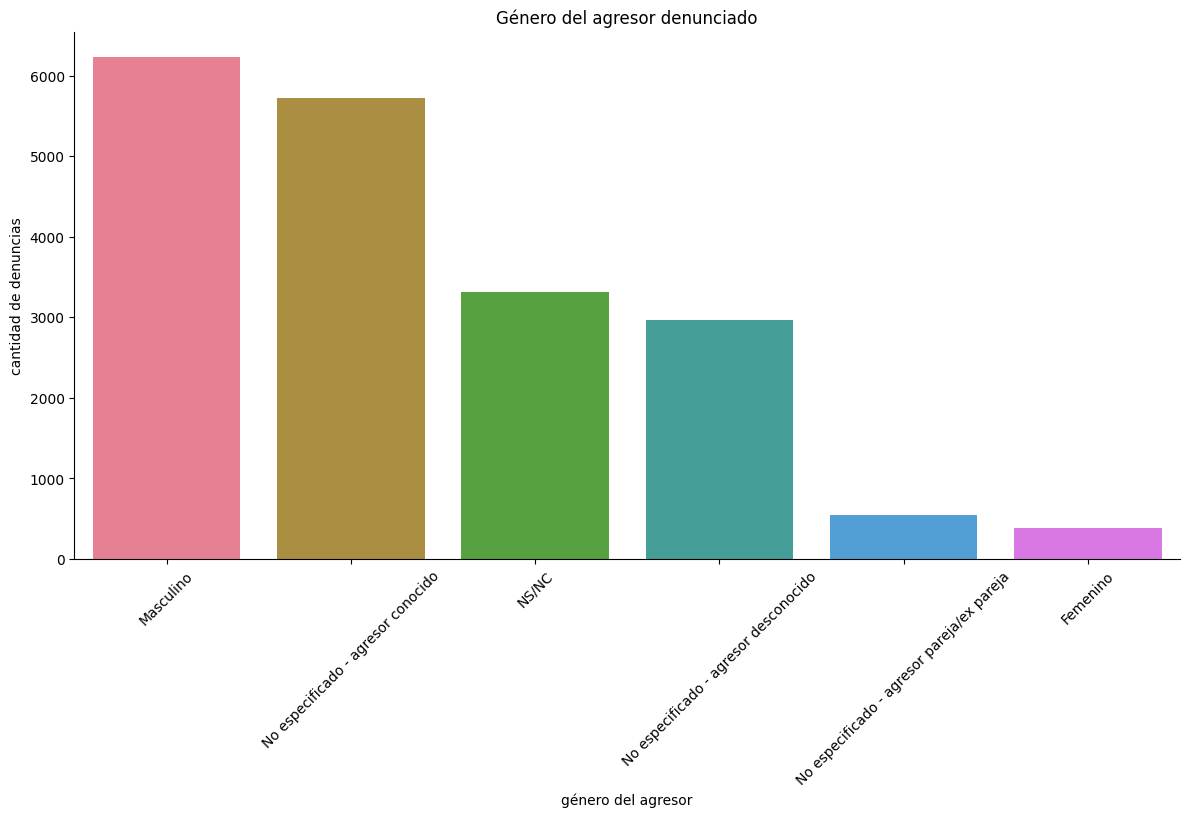

In [51]:
plot_genero_agresor = sns.catplot(x="genero_agresor", kind="count", data=llamados, height=6, aspect=2, order=llamados.genero_agresor.value_counts().index, palette=sns.color_palette("husl",6))
plot_genero_agresor.set(xlabel='género del agresor', ylabel='cantidad de denuncias')
plt.title("Género del agresor denunciado") 
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

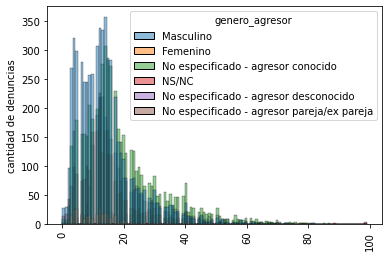

In [28]:
plot_edad = sns.histplot(x="victima_edad", data=llamados, hue='genero_agresor')
plot_edad.set(xlabel= '', ylabel='cantidad de denuncias')
plt.title("") 
plt.xticks(rotation=90)
plt.show

### Familiar/No familiar

In [52]:
lista_familiar = ['Abuela', 'Abuelo', 'Hermana', 'Hermano', 'Madrastra', 'Madre', 'Otro pariente', 'Padrastro', 'Padre', 'Tío' ]
lista_no_familiar = ['Desconocido', 'Conocido no familiar (Amigo, vecino, entre otros)']
lista_pareja_exp = ['Pareja de la víctima', 'Ex pareja de la víctima']

def columna_fam_nofam (x):
    if x in lista_familiar:
        return 'Familiar'
    elif x in lista_no_familiar:
        return 'No Familiar'
    elif x in lista_pareja_exp:
        return 'Pareja/Ex'
    elif x == 'NS/NC':
        return x
    else:
        return 'N/A'

In [53]:
llamados['agresor_fam_no_fam'] = \
    llamados.victima_vinculo_agresor.apply(columna_fam_nofam)

### Vínculos agresor - víctima

In [98]:
llamados['victima_vinculo_agresor'] = llamados['victima_vinculo_agresor'].replace(
    'Conocido no familiar (Amigo, vecino, entre otros)', 'Conocido no familiar'
)

In [11]:
lista_conocido_familiar = ['Abuela', 'Abuelo','Pareja de la víctima', 'Ex pareja de la víctima', 'Hermana', 'Hermano', 'Madrastra', 'Madre', 'Otro pariente', 'Padrastro', 'Padre', 'Tío' ]
lista_no_conocido = ['Desconocido', ]
lista_no_declarado = ['NS/NC']

def conocido_no_conocido (x):
    if x in lista_conocido_familiar:
        return 'Conocido familiar'
    elif x == 'Desconocido':
        return x
    elif x in lista_no_declarado:
        return 'NS/NC'
    elif x == 'Conocido no familiar':
        return x
    else:
        return 'N/A'

llamados['agresor_conocido_no_conocido'] = \
    llamados.victima_vinculo_agresor.apply(conocido_no_conocido)

### Conocimiento o no del agresor

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_9803/4122599813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_victima_agresor_conocido_no = sns.barplot(


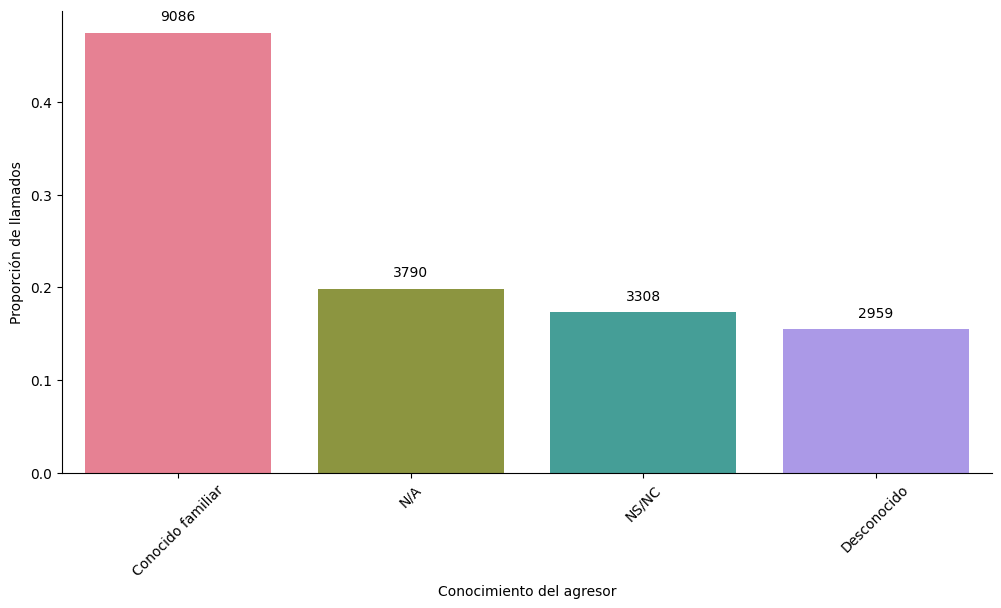

In [12]:


plt.figure(figsize=(12, 6))
plot_victima_agresor_conocido_no = sns.barplot(
    x=llamados.agresor_conocido_no_conocido.value_counts(normalize=True).index,
    y=llamados.agresor_conocido_no_conocido.value_counts(normalize=True).values,
    palette=sns.color_palette("husl",4)
)

# Anotación de las barras
for i, count in enumerate(llamados.agresor_conocido_no_conocido.value_counts().values):
    plot_victima_agresor_conocido_no.text(i, llamados.agresor_conocido_no_conocido.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_victima_agresor_conocido_no.set(xlabel='Conocimiento del agresor', ylabel='Proporción de llamados')

plt.xticks(rotation=45)
sns.despine()
plt.show()

In [165]:
2959/19143*100

15.457347333228858

In [162]:
3790/19143*100

19.79835971373348

In [163]:
47.4+19.7

67.1

In [7]:
# arma fin de semana

llamados['fin_de_semana'] = np.where(llamados['llamado_fecha_hora'].dt.day_of_week.isin([5,6]), 1,0)

# arma momento del día mañana, mediodía, tarde, noche, madrugada c la hora

def day_part(hour):
    if hour in [6,7,8,9,10,11]:
        return "mañana"
    elif hour in [12,13]:
        return "mediodía"
    elif hour in [14,15,16,17,18,19]:
        return "tarde"
    elif hour in [20,21,22,23,0]:
        return "noche"
    elif hour in [1,2,3,4,5]:
        return "madrugada"


llamados['momento_dia'] = (llamados['llamado_fecha_hora'].dt.hour).apply(day_part)


# arma estación del año

verano_empieza = pd.to_datetime("12-21", format="%m-%d").dayofyear
otoño_empieza = pd.to_datetime("03-21", format="%m-%d").dayofyear
invierno_empieza = pd.to_datetime("06-21", format="%m-%d").dayofyear
primavera_empieza = pd.to_datetime("09-21", format="%m-%d").dayofyear

for index, date in llamados["llamado_fecha_hora"].items():
    if (date.dayofyear >= verano_empieza) or (date.dayofyear < otoño_empieza):
        llamados.at[index, "estacion_del_año"] = "Verano"
    elif (date.dayofyear >= otoño_empieza) and (date.dayofyear < invierno_empieza):
        llamados.at[index, "estacion_del_año"] = "Otoño"
    elif (date.dayofyear >= invierno_empieza) and (date.dayofyear < primavera_empieza):
        llamados.at[index, "estacion_del_año"] = "Invierno"
    else:
        llamados.at[index, "estacion_del_año"] = "Primavera"

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_9803/376838976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_fin_de_semana = sns.barplot(


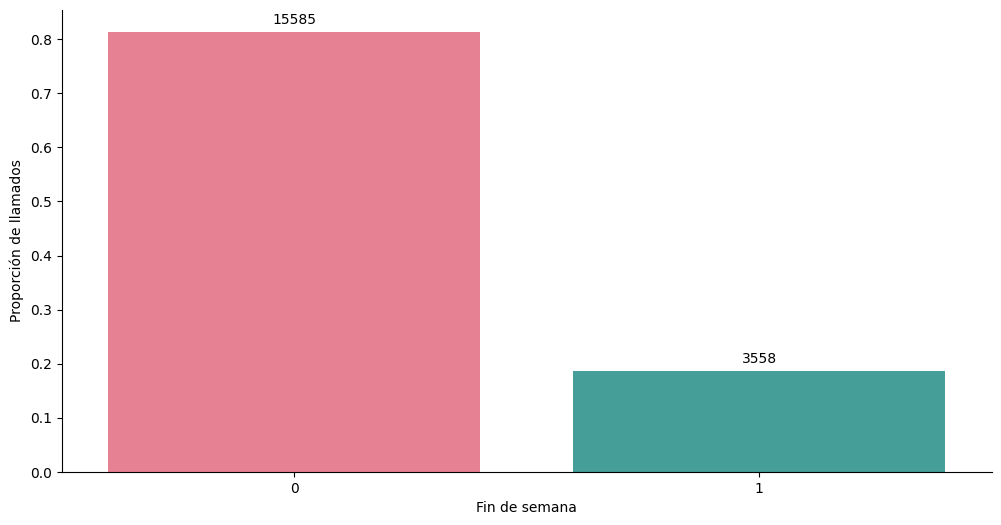

In [13]:
plt.figure(figsize=(12, 6))
plot_fin_de_semana = sns.barplot(
    x=llamados.fin_de_semana.value_counts(normalize=True).index,
    y=llamados.fin_de_semana.value_counts(normalize=True).values,
    palette=sns.color_palette("husl",2)
)

# Anotación de las barras
for i, count in enumerate(llamados.fin_de_semana.value_counts().values):
    plot_fin_de_semana.text(i, llamados.fin_de_semana.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_fin_de_semana.set(xlabel='Fin de semana', ylabel='Proporción de llamados')

plt.xticks(rotation=0)
sns.despine()
plt.show()

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_9803/3036675862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_momento_dia = sns.barplot(


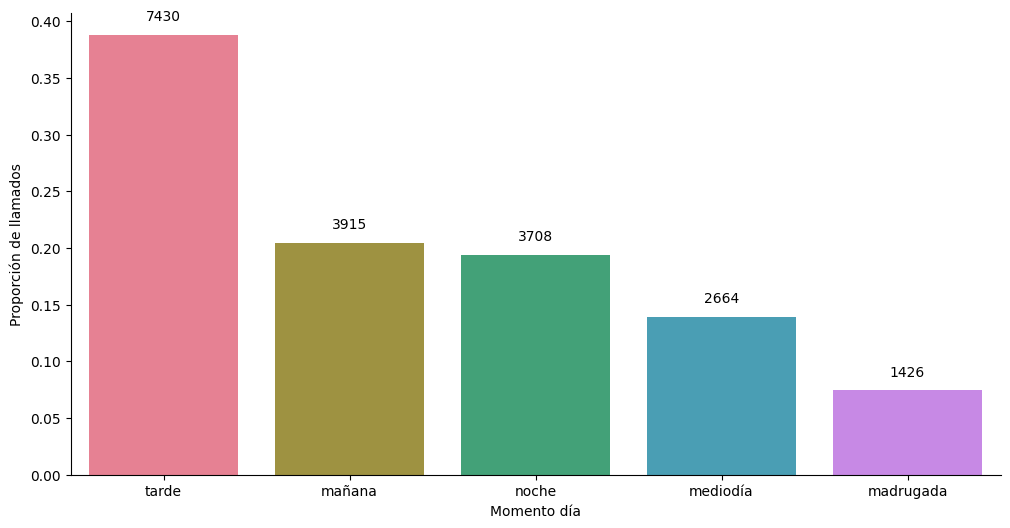

In [14]:
plt.figure(figsize=(12, 6))
plot_momento_dia = sns.barplot(
    x=llamados.momento_dia.value_counts(normalize=True).index,
    y=llamados.momento_dia.value_counts(normalize=True).values,
    palette=sns.color_palette("husl",5)
)

# Anotación de las barras
for i, count in enumerate(llamados.momento_dia.value_counts().values):
    plot_momento_dia.text(i, llamados.momento_dia.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_momento_dia.set(xlabel='Momento día', ylabel='Proporción de llamados')

plt.xticks(rotation=0)
sns.despine()
plt.show()

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_9803/1565929970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_estacion_del_año = sns.barplot(


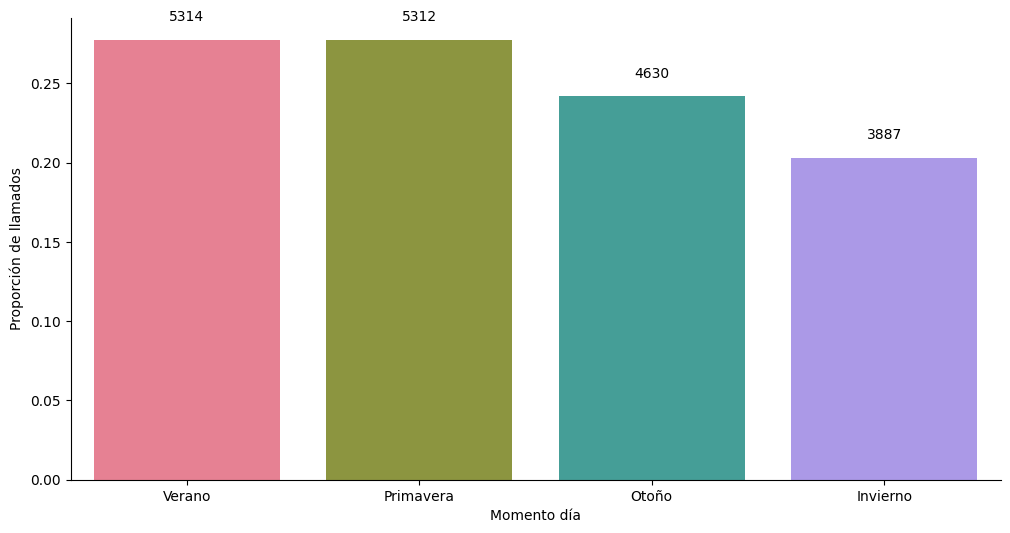

In [15]:
plt.figure(figsize=(12, 6))
plot_estacion_del_año = sns.barplot(
    x=llamados.estacion_del_año.value_counts(normalize=True).index,
    y=llamados.estacion_del_año.value_counts(normalize=True).values,
    palette=sns.color_palette("husl",4)
)

# Anotación de las barras
for i, count in enumerate(llamados.estacion_del_año.value_counts().values):
    plot_estacion_del_año.text(i, llamados.estacion_del_año.value_counts(normalize=True).values[i] + 0.01, 
                           str(count), ha='center', va='bottom')


plot_estacion_del_año.set(xlabel='Momento día', ylabel='Proporción de llamados')

plt.xticks(rotation=0)
sns.despine()
plt.show()

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_64287/3400446296.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  llamados_mensuales = llamados_v2.resample('M', on='llamado_fecha_hora').size()


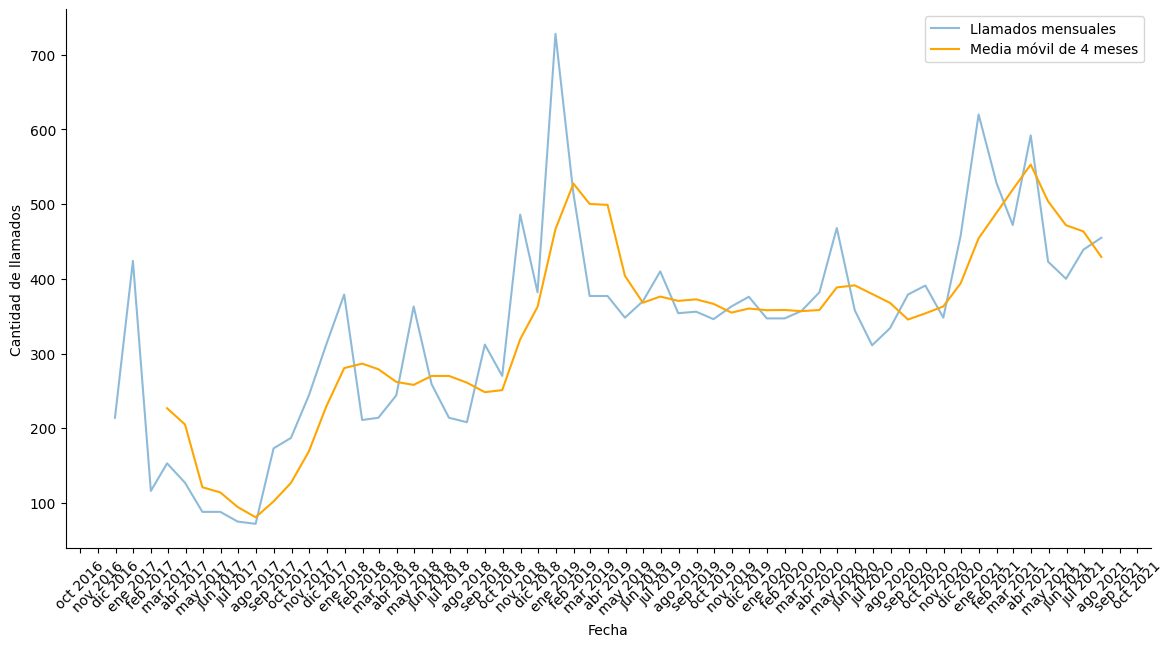

In [25]:



llamados_mensuales = llamados.resample('M', on='llamado_fecha_hora').size()
smooth = llamados_mensuales.rolling(window=4).mean()

locale.setlocale(locale.LC_TIME, 'es_ES')

# Plot the smoothed time series along with the original
plt.figure(figsize=(14, 7))
plt.plot(llamados_mensuales, label='Llamados mensuales', alpha=0.5)
plt.plot(smooth, label='Media móvil de 4 meses', color='orange')
plt.title('')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de llamados')


# Format the x-axis to show month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.legend()
sns.despine()
plt.show()




In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(14, 24), sharey=True)


# Títulos
variables = [
    ('llamado_provincia', 'Provincia'),
    ('hecho_lugar', 'Lugar de los hechos'),
    ('victima_nacionalidad', 'Nacionalidad de la víctima'),
    ('victima_genero', 'Género de la víctima'),
    ('victima_discapacidad', 'Discapacidad'),
    ('agresor_conocido_no_conocido', 'Agresor conocido o no'),
    ('victima_vinculo_agresor', 'Vínculo con agresor'),
    ('victima_convive_agresor', 'Convive')
]

# Barplot normalizado por varaible
for ax, (variable, title) in zip(axes.flatten(), variables):
    # Create the barplot
    sns.barplot(
        x=llamados[variable].value_counts(normalize=True).index,
        y=llamados[variable].value_counts(normalize=True).values,
        palette=sns.color_palette('Set2'),
        ax=ax
    )

    # Annotate the bars with actual counts
    for i, count in enumerate(llamados[variable].value_counts().values):
        ax.text(i, llamados[variable].value_counts(normalize=True).values[i] + 0.01,
                str(count), ha='center', va='bottom')

    # Set axis labels and title
    ax.set(xlabel=title, ylabel='Proporción de llamados' if ax == axes[0, 0] else '')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90 if variable != 'victima_nacionalidad' else 0)

    # Remove the top and right spines
    sns.despine(ax=ax)

# Adjust layout
plt.tight_layout()
plt.show()





### Análisis multivariados de convive

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_64287/1388142912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='victima_convive_agresor', y='victima_edad', data=llamados_v2, palette="husl", jitter=True, size=5)


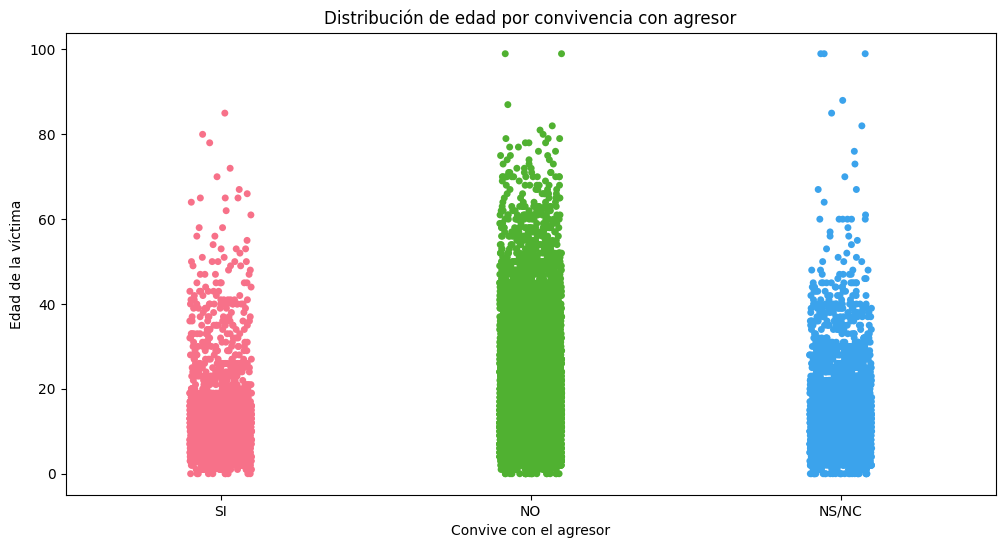

In [3]:
# Alternative: Use stripplot instead
plt.figure(figsize=(12, 6))
sns.stripplot(x='victima_convive_agresor', y='victima_edad', data=llamados, palette="husl", jitter=True, size=5)
plt.title('Distribución de edad por convivencia con agresor')
plt.xlabel('Convive con el agresor')
plt.ylabel('Edad de la víctima')
plt.show()

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_64287/2955170080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='victima_convive_agresor', y='victima_edad', data=llamados_v2, palette=palette_sino_desat)


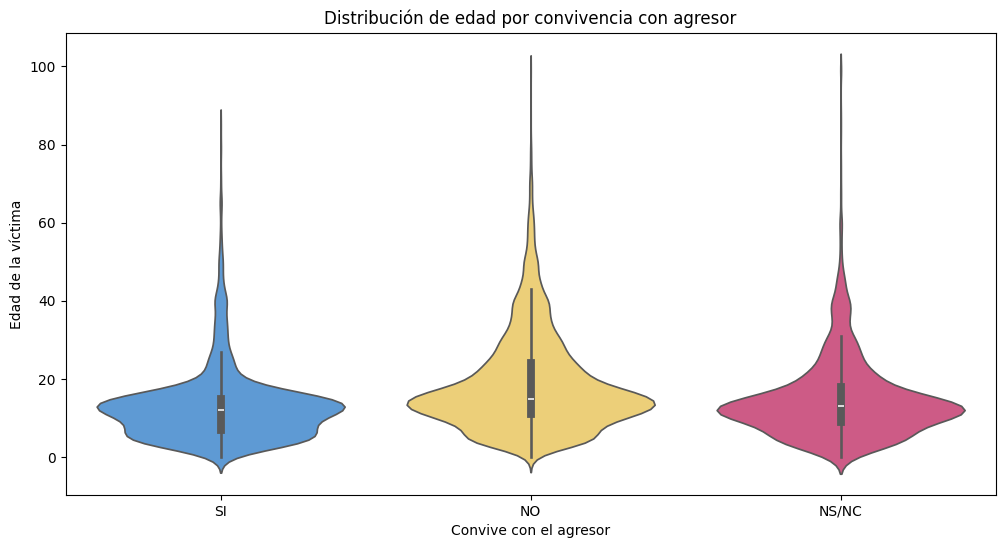

In [5]:
palette_sino_desat ={"SI": "#4a9ae8", "NO": "#ffd966", "NS/NC": "#e04881"}
# Violin Plot Example
plt.figure(figsize=(12, 6))
sns.violinplot(x='victima_convive_agresor', y='victima_edad', data=llamados, palette=palette_sino_desat)
plt.title('Distribución de edad por convivencia con agresor')
plt.xlabel('Convive con el agresor')
plt.ylabel('Edad de la víctima')
plt.show()

/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_64287/598113544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='victima_convive_agresor', y='victima_edad', data=llamados_v2, palette=palette_sino_desat)


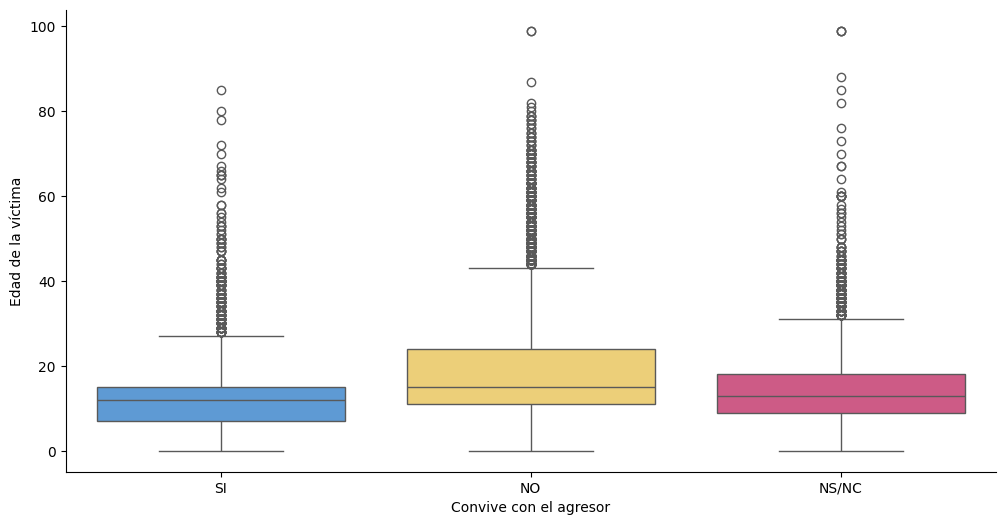

In [24]:
palette_sino_desat={"SI": "#4a9ae8", "NO": "#ffd966", "NS/NC": "#e04881"}
# Violin Plot Example
plt.figure(figsize=(12, 6))
sns.boxplot(x='victima_convive_agresor', y='victima_edad', data=llamados, palette=palette_sino_desat)
plt.title('')
plt.xlabel('Convive con el agresor')
plt.ylabel('Edad de la víctima')
sns.despine()
plt.show()

In [26]:
Q1 = llamados.victima_edad.quantile(0.25)
Q3 = llamados.victima_edad.quantile(0.75)
IQR = Q3 - Q1

In [27]:
print(Q1)
print(Q3)
print(IQR)

10.0
21.0
11.0


In [28]:
convive_si = llamados[llamados['victima_convive_agresor'] == 'SI']
convive_no = llamados[llamados['victima_convive_agresor'] == 'NO']
convive_nsnc = llamados[llamados['victima_convive_agresor'] == 'NS/NC']

In [31]:
SI_Q1 = convive_si.victima_edad.quantile(0.25)
SI_Q3 = convive_si.victima_edad.quantile(0.75)
SI_IQR = Q3 - Q1

print(SI_Q1)
print(SI_Q3)
print(SI_IQR)

7.0
15.0
11.0


In [32]:
NO_Q1 = convive_no.victima_edad.quantile(0.25)
NO_Q3 = convive_no.victima_edad.quantile(0.75)
NO_IQR = Q3 - Q1

print(NO_Q1)
print(NO_Q3)
print(NO_IQR)

11.0
24.0
11.0


In [33]:
NSNC_Q1 = convive_nsnc.victima_edad.quantile(0.25)
NSNC_Q3 = convive_nsnc.victima_edad.quantile(0.75)
NSNC_IQR = Q3 - Q1

print(NSNC_Q1)
print(NSNC_Q3)
print(NSNC_IQR)

9.0
18.0
11.0


In [34]:
# initialize list of lists
data = [['Q1', 7,11,9], ['Q3', 15,24,18], ['IQR', 11,11,11]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['', 'Convive: Sí', 'Convive: No', 'Convive: NS/NC'])

In [35]:
df

,,Convive: Sí,Convive: No,Convive: NS/NC
0,Q1,7,11,9
1,Q3,15,24,18
2,IQR,11,11,11


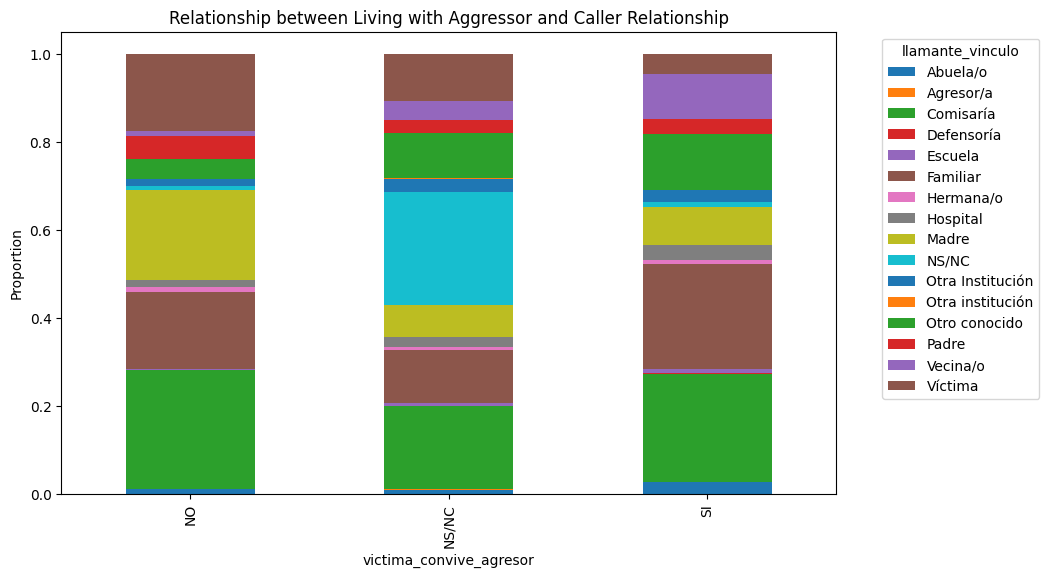

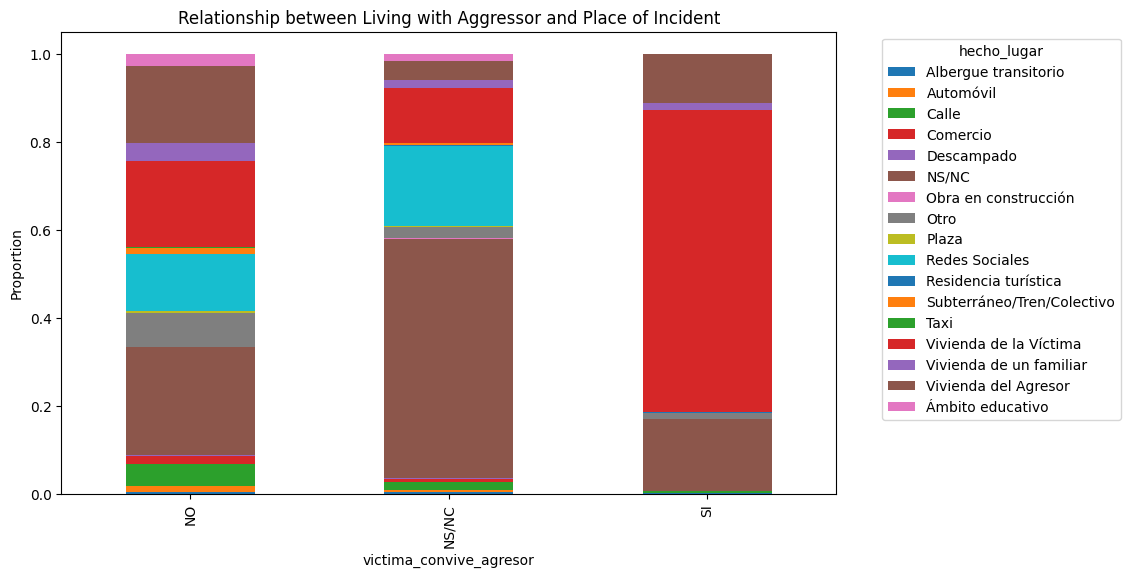

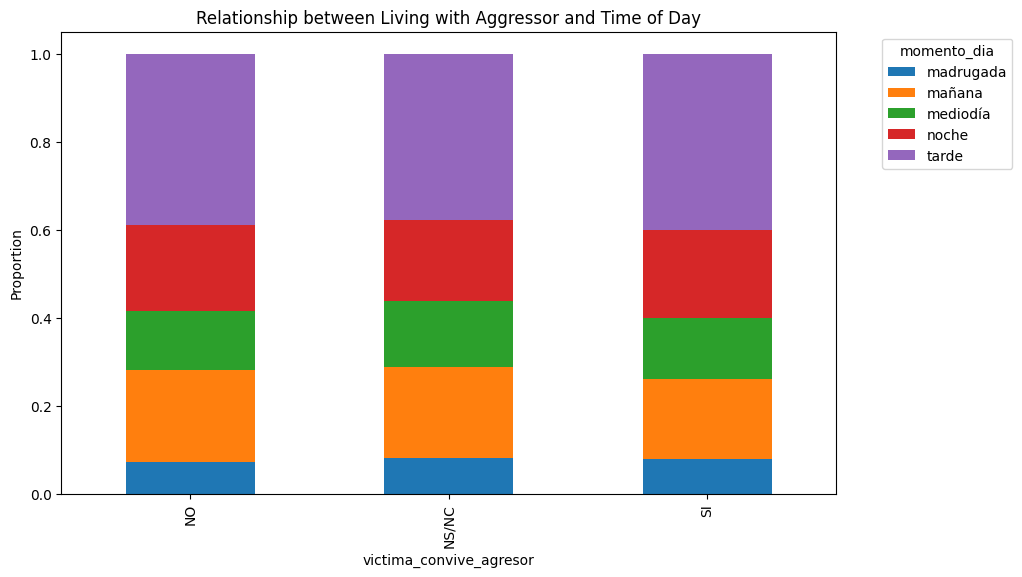

In [20]:



# Helper function to create stacked bar plots
def stacked_bar_plot(llamados, x_col, y_col, title):
    crosstab = pd.crosstab(llamados[x_col], llamados[y_col], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel('Proportion')
    plt.legend(title=y_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot for 'victima_convive_agresor' vs. 'llamante_vinculo'
stacked_bar_plot(llamados, 'victima_convive_agresor', 'llamante_vinculo', 'Relationship between Living with Aggressor and Caller Relationship')

# Plot for 'victima_convive_agresor' vs. 'hecho_lugar'
stacked_bar_plot(llamados, 'victima_convive_agresor', 'hecho_lugar', 'Relationship between Living with Aggressor and Place of Incident')

# Plot for 'victima_convive_agresor' vs. 'momento_dia'
stacked_bar_plot(llamados, 'victima_convive_agresor', 'momento_dia', 'Relationship between Living with Aggressor and Time of Day')


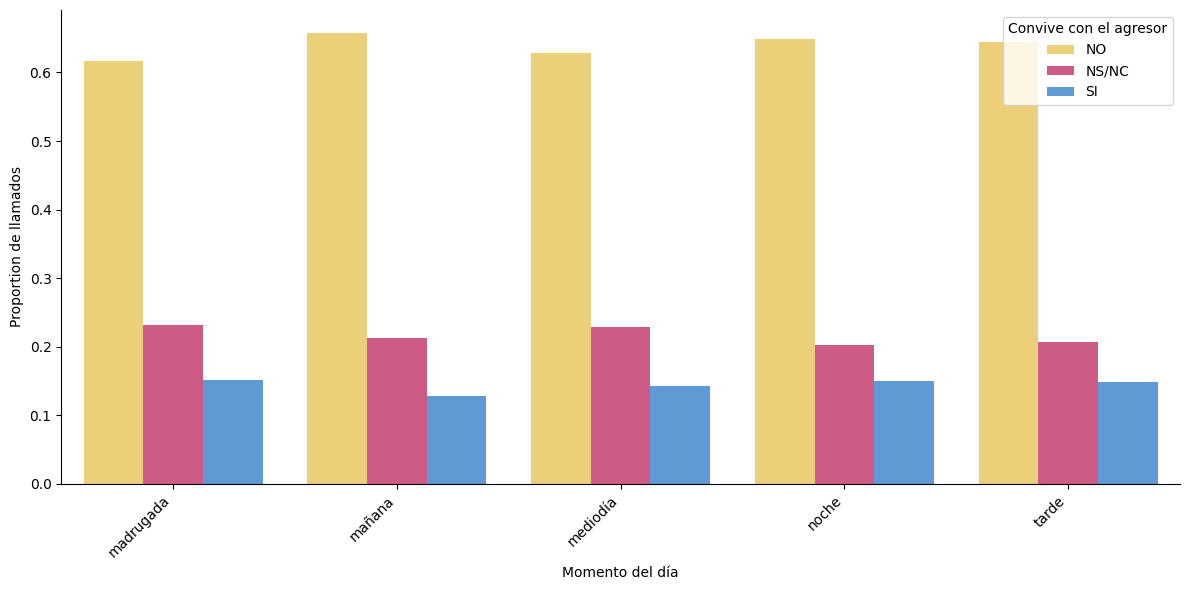

In [42]:
palette_sino_desat ={"SI": "#4a9ae8", "NO": "#ffd966", "NS/NC": "#e04881"}



# Assuming df is your DataFrame

# Calculate counts for each group
grouped_counts = llamados.groupby(['momento_dia', 'victima_convive_agresor']).size().reset_index(name='counts')

# Calculate the total counts for each 'hecho_lugar' to normalize
total_counts = grouped_counts.groupby('momento_dia')['counts'].sum().reset_index(name='total_counts')

# Merge the total counts back to the grouped_counts DataFrame
grouped_counts = pd.merge(grouped_counts, total_counts, on='momento_dia')

# Calculate the normalized counts (proportions)
grouped_counts['proportion'] = grouped_counts['counts'] / grouped_counts['total_counts']

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    x='momento_dia', 
    y='proportion', 
    hue='victima_convive_agresor', 
    data=grouped_counts, 
    palette=palette_sino_desat
)

# Customize plot
plt.title('')
plt.xlabel('Momento del día')
plt.ylabel('Proportion de llamados')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Convive con el agresor')
plt.tight_layout()

# Show plot
sns.despine()
plt.show()

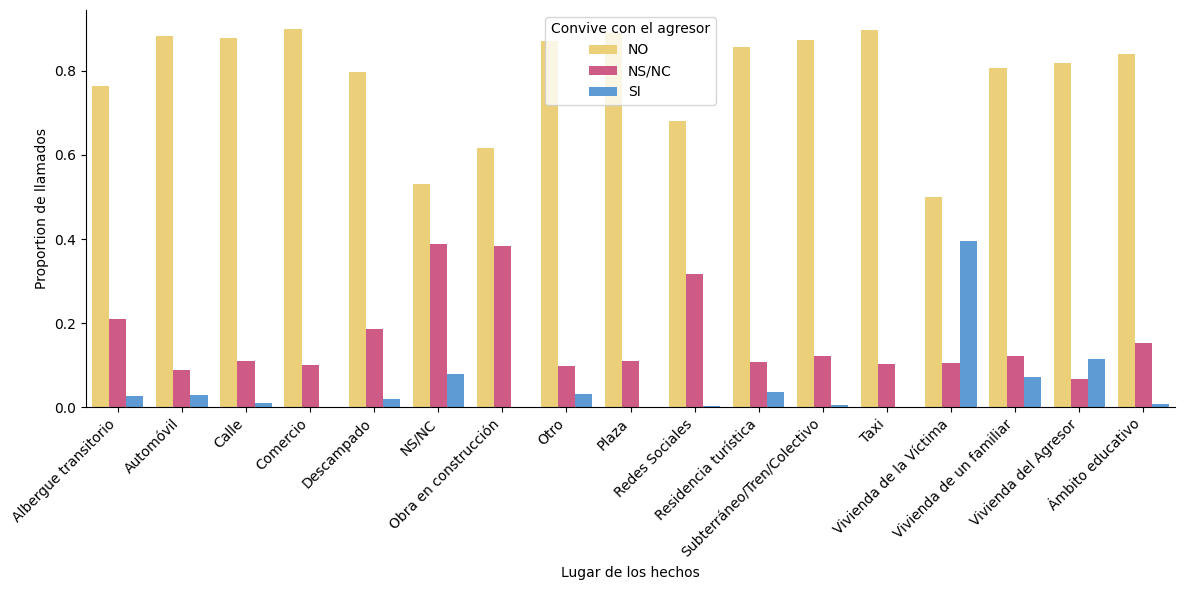

In [41]:

palette_sino_desat ={"SI": "#4a9ae8", "NO": "#ffd966", "NS/NC": "#e04881"}



# Assuming df is your DataFrame

# Calculate counts for each group
grouped_counts = llamados.groupby(['hecho_lugar', 'victima_convive_agresor']).size().reset_index(name='counts')

# Calculate the total counts for each 'hecho_lugar' to normalize
total_counts = grouped_counts.groupby('hecho_lugar')['counts'].sum().reset_index(name='total_counts')

# Merge the total counts back to the grouped_counts DataFrame
grouped_counts = pd.merge(grouped_counts, total_counts, on='hecho_lugar')

# Calculate the normalized counts (proportions)
grouped_counts['proportion'] = grouped_counts['counts'] / grouped_counts['total_counts']

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    x='hecho_lugar', 
    y='proportion', 
    hue='victima_convive_agresor', 
    data=grouped_counts, 
    palette=palette_sino_desat
)

# Customize plot
plt.title('')
plt.xlabel('Lugar de los hechos')
plt.ylabel('Proportion de llamados')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Convive con el agresor')
plt.tight_layout()

# Show plot
sns.despine()
plt.show()



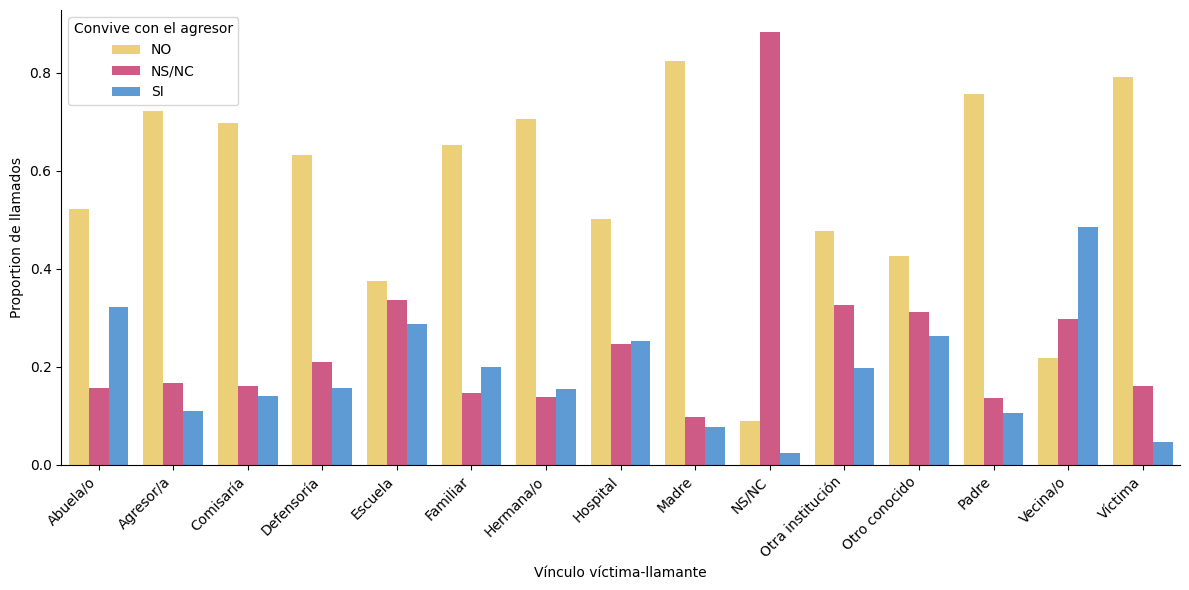

In [9]:

palette_sino_desat ={"SI": "#4a9ae8", "NO": "#ffd966", "NS/NC": "#e04881"}



# Assuming df is your DataFrame

# Calculate counts for each group
grouped_counts = llamados.groupby(['llamante_vinculo', 'victima_convive_agresor']).size().reset_index(name='counts')

# Calculate the total counts for each 'llamante_vinculo' to normalize
total_counts = grouped_counts.groupby('llamante_vinculo')['counts'].sum().reset_index(name='total_counts')

# Merge the total counts back to the grouped_counts DataFrame
grouped_counts = pd.merge(grouped_counts, total_counts, on='llamante_vinculo')

# Calculate the normalized counts (proportions)
grouped_counts['proportion'] = grouped_counts['counts'] / grouped_counts['total_counts']

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    x='llamante_vinculo', 
    y='proportion', 
    hue='victima_convive_agresor', 
    data=grouped_counts, 
    palette=palette_sino_desat
)

# Customize plot
plt.title('')
plt.xlabel('Vínculo víctima-llamante')
plt.ylabel('Proportion de llamados')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Convive con el agresor')
plt.tight_layout()

# Show plot
sns.despine()
plt.show()

In [ ]:
# categioría vecina/o cuántos sí, no y ns/nc en cinvive

grouped_counts = llamados.groupby(['momento_dia', 'victima_convive_agresor']).size().reset_index(name='counts')

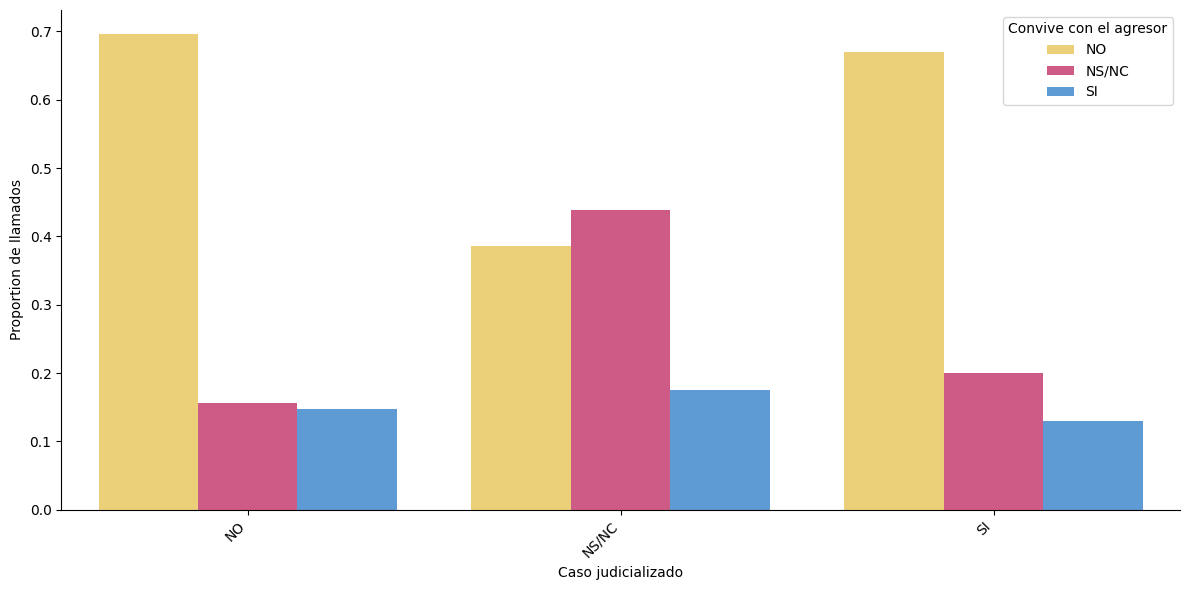

In [39]:
palette_sino_desat ={"SI": "#4a9ae8", "NO": "#ffd966", "NS/NC": "#e04881"}



# Assuming df is your DataFrame

# Calculate counts for each group
grouped_counts = llamados.groupby(['caso_judicializado', 'victima_convive_agresor']).size().reset_index(name='counts')

# Calculate the total counts for each 'caso_judicializado' to normalize
total_counts = grouped_counts.groupby('caso_judicializado')['counts'].sum().reset_index(name='total_counts')

# Merge the total counts back to the grouped_counts DataFrame
grouped_counts = pd.merge(grouped_counts, total_counts, on='caso_judicializado')

# Calculate the normalized counts (proportions)
grouped_counts['proportion'] = grouped_counts['counts'] / grouped_counts['total_counts']

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    x='caso_judicializado', 
    y='proportion', 
    hue='victima_convive_agresor', 
    data=grouped_counts, 
    palette=palette_sino_desat
)

# Customize plot
plt.title('')
plt.xlabel('Caso judicializado')
plt.ylabel('Proportion de llamados')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Convive con el agresor')
plt.tight_layout()

# Show plot
sns.despine()
plt.show()

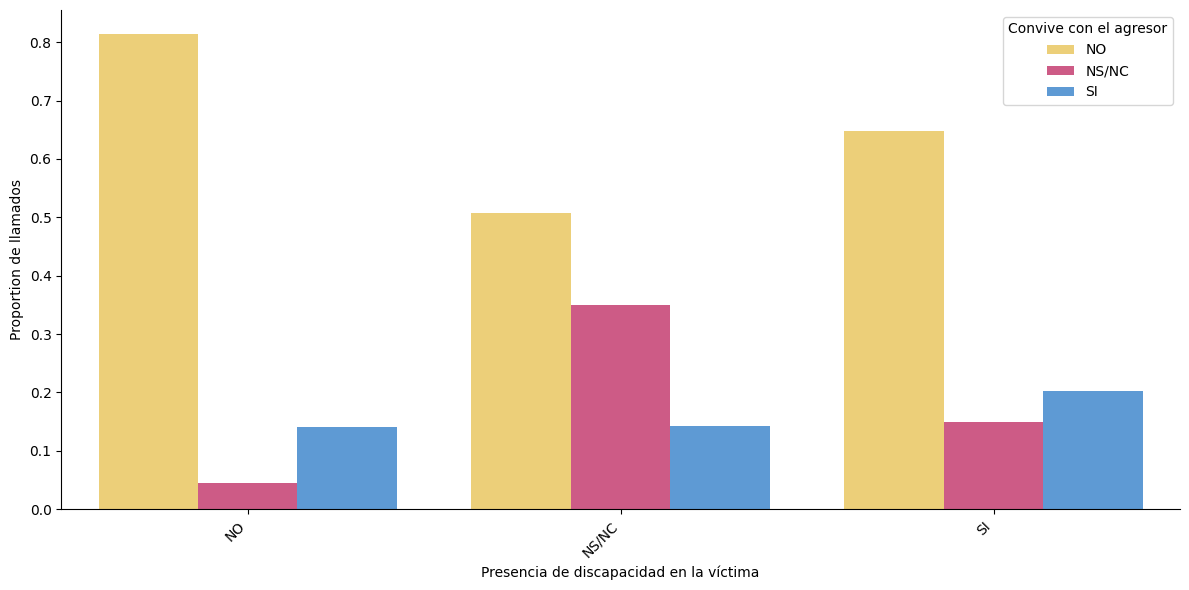

In [38]:
palette_sino_desat ={"SI": "#4a9ae8", "NO": "#ffd966", "NS/NC": "#e04881"}



# Assuming df is your DataFrame

# Calculate counts for each group
grouped_counts = llamados.groupby(['victima_discapacidad', 'victima_convive_agresor']).size().reset_index(name='counts')

# Calculate the total counts for each 'victima_discapacidad' to normalize
total_counts = grouped_counts.groupby('victima_discapacidad')['counts'].sum().reset_index(name='total_counts')

# Merge the total counts back to the grouped_counts DataFrame
grouped_counts = pd.merge(grouped_counts, total_counts, on='victima_discapacidad')

# Calculate the normalized counts (proportions)
grouped_counts['proportion'] = grouped_counts['counts'] / grouped_counts['total_counts']

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    x='victima_discapacidad', 
    y='proportion', 
    hue='victima_convive_agresor', 
    data=grouped_counts, 
    palette=palette_sino_desat
)

# Customize plot
plt.title('')
plt.xlabel('Presencia de discapacidad en la víctima')
plt.ylabel('Proportion de llamados')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Convive con el agresor')
plt.tight_layout()

# Show plot
sns.despine()
plt.show()